# **1000 Audio Features**

# 1.Data Preparation

## 1.1.Read the data

In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
import numpy as np

In [ ]:
# get the data and create dataframe
url = "https://drive.google.com/file/d/1I87JU8W7VDXoqlvnEdLxdf-5wEHO4yNj/view?usp=share_link" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]

df_original = pd.read_csv(path)

df_original.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,All Shook Up,Elvis Presley,0.624,0.468,10,-12.162,1,0.1320,0.881,0.000006,0.144,0.952,74.139,NaN,117080,4,5ueyLj6e6oVaTY0KQ6yLaA,https://open.spotify.com/track/5ueyLj6e6oVaTY0...
1,I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.107,0.591,127.150,NaN,223760,4,3aEJMh1cXKEjgh52claxQp,https://open.spotify.com/track/3aEJMh1cXKEjgh5...
2,Smoke Gets In Your Eyes,The Platters,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.617,0.224,114.278,NaN,157293,4,307XEC1IUwUs9ojlEFwH7f,https://open.spotify.com/track/307XEC1IUwUs9oj...
3,"What'd I Say, Pt. 1 & 2",Ray Charles,0.540,0.681,4,-5.440,1,0.0508,0.808,0.000000,0.162,0.794,88.385,NaN,307053,4,5yQ9iMZXGcr5rlO4hoLsP4,https://open.spotify.com/track/5yQ9iMZXGcr5rlO...
4,Dream A Little Dream Of Me,Ella Fitzgerald,0.455,0.167,0,-13.613,1,0.0739,0.918,0.000000,0.173,0.404,76.118,NaN,185067,4,3vFVS2WYHDG4KkWCNecvpn,https://open.spotify.com/track/3vFVS2WYHDG4KkW...


## 1.2.Initial quick exploration

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1440 non-null   object 
 1   artist            1440 non-null   object 
 2   danceability      1440 non-null   float64
 3   energy            1440 non-null   float64
 4   key               1440 non-null   int64  
 5   loudness          1440 non-null   float64
 6   mode              1440 non-null   int64  
 7   speechiness       1440 non-null   float64
 8   acousticness      1440 non-null   float64
 9   instrumentalness  1440 non-null   float64
 10  liveness          1440 non-null   float64
 11  valence           1440 non-null   float64
 12  tempo             1440 non-null   float64
 13  type              0 non-null      float64
 14  duration_ms       1440 non-null   int64  
 15  time_signature    1440 non-null   int64  
 16  id                1440 non-null   object 


## 1.3.Drop unwanted features

In [ ]:
# set index to columns "name" and "artist", because they are not numeric data
df_original = df_original.set_index(["name", "artist"])

# drop columns
df_original = df_original.drop(columns=["type", "id", "html", "mode", "time_signature"])
df_original

,,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
name,artist,,,,,,,,,,,
All Shook Up,Elvis Presley,0.6240,0.46800,10,-12.162,0.1320,0.881,0.000006,0.1440,0.9520,74.139,117080
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.5850,0.24700,1,-12.612,0.0400,0.452,0.000009,0.1070,0.5910,127.150,223760
Smoke Gets In Your Eyes,The Platters,0.2900,0.22700,3,-13.060,0.0311,0.944,0.000079,0.6170,0.2240,114.278,157293
"What'd I Say, Pt. 1 & 2",Ray Charles,0.5400,0.68100,4,-5.440,0.0508,0.808,0.000000,0.1620,0.7940,88.385,307053
Dream A Little Dream Of Me,Ella Fitzgerald,0.4550,0.16700,0,-13.613,0.0739,0.918,0.000000,0.1730,0.4040,76.118,185067
...,...,...,...,...,...,...,...,...,...,...,...,...
"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.10100,6,-21.873,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000
"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",Arnold Schoenberg,0.0596,0.00093,9,-42.959,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187


## 1.4.Remove outlier values

In [ ]:
# remove outlier values (https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe)
import pandas as pd
import numpy as np
from scipy import stats


df = df_original[(np.abs(stats.zscore(df_original)) < 3).all(axis=1)]
df

,,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
name,artist,,,,,,,,,,,
All Shook Up,Elvis Presley,0.6240,0.4680,10,-12.162,0.1320,0.881,0.000006,0.1440,0.9520,74.139,117080
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.5850,0.2470,1,-12.612,0.0400,0.452,0.000009,0.1070,0.5910,127.150,223760
"What'd I Say, Pt. 1 & 2",Ray Charles,0.5400,0.6810,4,-5.440,0.0508,0.808,0.000000,0.1620,0.7940,88.385,307053
Dream A Little Dream Of Me,Ella Fitzgerald,0.4550,0.1670,0,-13.613,0.0739,0.918,0.000000,0.1730,0.4040,76.118,185067
That'll Be The Day,Buddy Holly,0.5360,0.6370,2,-7.774,0.0343,0.467,0.000000,0.0838,0.7980,115.240,150133
...,...,...,...,...,...,...,...,...,...,...,...,...
"Music for Strings, Percussion and Celesta, BB 114: II. Allegro",Béla Bartók,0.3860,0.1240,11,-22.869,0.0440,0.945,0.917000,0.0853,0.3190,142.307,443907
A Flock Descends Into The Pentagonal Garden,Toru Takemitsu,0.0619,0.0830,4,-25.543,0.0452,0.935,0.651000,0.0860,0.0261,61.525,774707
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.1880,0.1010,6,-21.873,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000


# 2.Data Modeling

## 2.1. Data scaling

In [ ]:
# Use the transformer "MinMaxScaler" to scale data

# 1. import the transformer
from sklearn.preprocessing import MinMaxScaler
 
# 2. initialize the transformer (optionally, set parameters)
scaled_df = MinMaxScaler(feature_range=(0,1))
 
# 3. fit the transformer to the data
scaled_df.fit(df)
 
# 4. use the transformer to transform the data
scaled_audio_features_1000 = scaled_df.transform(df)
 
# 5. reconvert the transformed data back to a DataFrame
scaled_df = pd.DataFrame(scaled_audio_features_1000,
             index=df.index,
             columns=df.columns)

scaled_df

,,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
name,artist,,,,,,,,,,,
All Shook Up,Elvis Presley,0.623102,0.469355,0.909091,0.593451,0.342354,0.885427,0.000006,0.209231,0.965817,0.156446,0.059621
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.579869,0.247248,0.090909,0.579640,0.052863,0.454270,0.000009,0.146445,0.591879,0.495643,0.176707
"What'd I Say, Pt. 1 & 2",Ray Charles,0.529986,0.683422,0.363636,0.799748,0.086847,0.812060,0.000000,0.239776,0.802155,0.247601,0.268125
Dream A Little Dream Of Me,Ella Fitzgerald,0.435761,0.166847,0.000000,0.548920,0.159534,0.922613,0.000000,0.258442,0.398177,0.169109,0.134240
That'll Be The Day,Buddy Holly,0.525551,0.639201,0.181818,0.728118,0.034928,0.469345,0.000000,0.107076,0.806298,0.419435,0.095898
...,...,...,...,...,...,...,...,...,...,...,...,...
"Music for Strings, Percussion and Celesta, BB 114: II. Allegro",Béla Bartók,0.359273,0.123631,1.000000,0.264854,0.065450,0.949749,0.930964,0.109622,0.310131,0.592626,0.418329
A Flock Descends Into The Pentagonal Garden,Toru Takemitsu,0.000000,0.082426,0.363636,0.182789,0.069226,0.939698,0.660914,0.110809,0.006733,0.075734,0.781398
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.139785,0.100516,0.545455,0.295421,0.066079,0.859296,0.432487,0.082640,0.016470,0.214001,0.869524


In [ ]:
scaled_df_woindex = scaled_df.reset_index()
scaled_df_woindex

,name,artist,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,All Shook Up,Elvis Presley,0.623102,0.469355,0.909091,0.593451,0.342354,0.885427,0.000006,0.209231,0.965817,0.156446,0.059621
1,I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.579869,0.247248,0.090909,0.579640,0.052863,0.454270,0.000009,0.146445,0.591879,0.495643,0.176707
2,"What'd I Say, Pt. 1 & 2",Ray Charles,0.529986,0.683422,0.363636,0.799748,0.086847,0.812060,0.000000,0.239776,0.802155,0.247601,0.268125
3,Dream A Little Dream Of Me,Ella Fitzgerald,0.435761,0.166847,0.000000,0.548920,0.159534,0.922613,0.000000,0.258442,0.398177,0.169109,0.134240
4,That'll Be The Day,Buddy Holly,0.525551,0.639201,0.181818,0.728118,0.034928,0.469345,0.000000,0.107076,0.806298,0.419435,0.095898
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,"Music for Strings, Percussion and Celesta, BB ...",Béla Bartók,0.359273,0.123631,1.000000,0.264854,0.065450,0.949749,0.930964,0.109622,0.310131,0.592626,0.418329
1313,A Flock Descends Into The Pentagonal Garden,Toru Takemitsu,0.000000,0.082426,0.363636,0.182789,0.069226,0.939698,0.660914,0.110809,0.006733,0.075734,0.781398
1314,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.139785,0.100516,0.545455,0.295421,0.066079,0.859296,0.432487,0.082640,0.016470,0.214001,0.869524
1315,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.078816,0.019914,0.363636,0.063098,0.058842,0.887437,0.512690,0.153233,0.040916,0.111464,0.276087


In [ ]:
scaled_df_woindex.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000
mean,0.540641,0.499663,0.471802,0.637133,0.173134,0.467565,0.178736,0.230749,0.481720,0.419502,0.224712
std,0.236875,0.278386,0.320987,0.197678,0.217908,0.374667,0.332533,0.176831,0.295440,0.197914,0.141573
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.389203,0.257298,0.181818,0.526547,0.046256,0.081505,0.000000,0.118446,0.231407,0.270552,0.142113
50%,0.566567,0.533675,0.454545,0.695495,0.076778,0.416079,0.000109,0.161717,0.484152,0.386297,0.185458
75%,0.728411,0.733672,0.727273,0.793795,0.186595,0.865326,0.109645,0.277108,0.738968,0.548329,0.257624
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


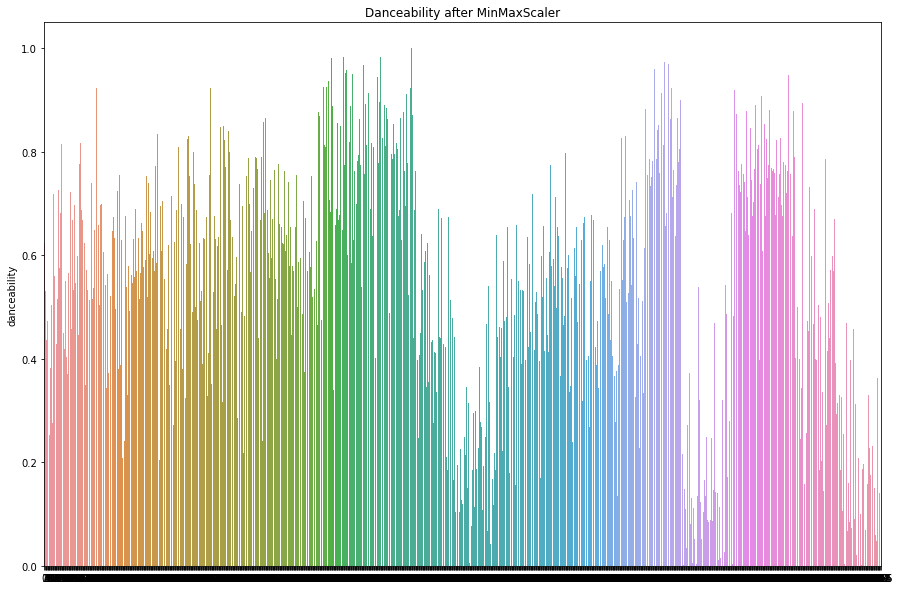

In [ ]:
# plot danceability
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=scaled_df_woindex, x=scaled_df_woindex.index, y="danceability")
plt.title("Danceability after MinMaxScaler")
plt.show()

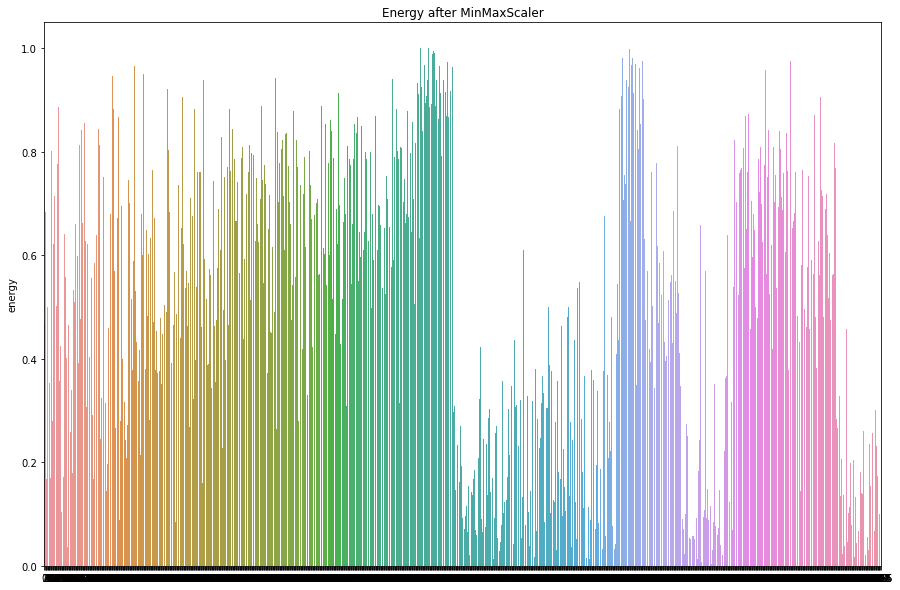

In [ ]:
# plot energy
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=scaled_df_woindex, x=scaled_df_woindex.index, y="energy")
plt.title("Energy after MinMaxScaler")
plt.show()

## 2.2.Choose the right K-Value of clusters

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_df)
kmeans.cluster_centers_

array([[0.66587598, 0.69962444, 0.47659522, 0.7614233 , 0.25174856,
        0.17517356, 0.0467619 , 0.24486288, 0.62306636, 0.45721066,
        0.19000002],
       [0.26160172, 0.16096091, 0.48099174, 0.35111614, 0.06453458,
        0.9062081 , 0.84145362, 0.18515882, 0.14666648, 0.33893422,
        0.3657209 ],
       [0.45419215, 0.29616114, 0.45631806, 0.55690217, 0.07807507,
        0.79983156, 0.04391307, 0.22967384, 0.39647832, 0.3913571 ,
        0.20965859]])

In [ ]:
kmeans.inertia_

534.47673940612

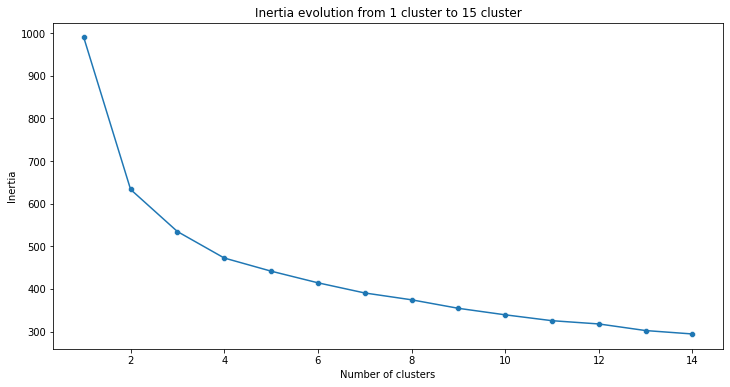

In [ ]:
max_k = 15
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(scaled_df).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia)
sns.scatterplot(x=range(1, max_k), y=inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

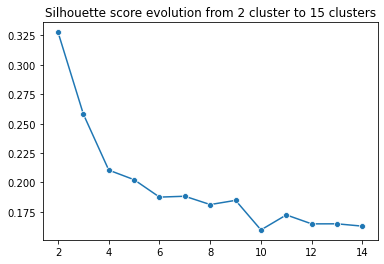

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
#silhouette_score(df_scaled, myKMeans.labels_)

max_k = 15
sil_score = []

for k in range(2, max_k): 
    labels = KMeans(n_clusters=k).fit(scaled_df).labels_
    sil_score.append(silhouette_score(scaled_df, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score, marker='o')
plt.show()
# Looking to the figure, I will set the k value to 3

## 2.3.Apply K-means to create clusters

In [ ]:
# 1. import the model
from sklearn.cluster import KMeans
 
# 2. initialize the model
my_kmeans = KMeans(n_clusters= 3)
 
# 3. fit the model to the data
my_kmeans.fit(scaled_df) # pass your scaled data here
 
# 4. obtain the cluster output
clusters = my_kmeans.predict(scaled_df) # pass your scaled data here
 
# 5. attach the cluster output to our original DataFrame
scaled_df["clusters"] = clusters
scaled_df

,,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,clusters
name,artist,,,,,,,,,,,,
All Shook Up,Elvis Presley,0.623102,0.469355,0.909091,0.593451,0.342354,0.885427,0.000006,0.209231,0.965817,0.156446,0.059621,2
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.579869,0.247248,0.090909,0.579640,0.052863,0.454270,0.000009,0.146445,0.591879,0.495643,0.176707,2
"What'd I Say, Pt. 1 & 2",Ray Charles,0.529986,0.683422,0.363636,0.799748,0.086847,0.812060,0.000000,0.239776,0.802155,0.247601,0.268125,2
Dream A Little Dream Of Me,Ella Fitzgerald,0.435761,0.166847,0.000000,0.548920,0.159534,0.922613,0.000000,0.258442,0.398177,0.169109,0.134240,2
That'll Be The Day,Buddy Holly,0.525551,0.639201,0.181818,0.728118,0.034928,0.469345,0.000000,0.107076,0.806298,0.419435,0.095898,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Music for Strings, Percussion and Celesta, BB 114: II. Allegro",Béla Bartók,0.359273,0.123631,1.000000,0.264854,0.065450,0.949749,0.930964,0.109622,0.310131,0.592626,0.418329,1
A Flock Descends Into The Pentagonal Garden,Toru Takemitsu,0.000000,0.082426,0.363636,0.182789,0.069226,0.939698,0.660914,0.110809,0.006733,0.075734,0.781398,1
"Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",Tristan Murail,0.139785,0.100516,0.545455,0.295421,0.066079,0.859296,0.432487,0.082640,0.016470,0.214001,0.869524,1


In [ ]:
# group the clusters by mean
scaled_df.groupby(by="clusters").mean()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
clusters,,,,,,,,,,,
0,0.665876,0.699624,0.476595,0.761423,0.251749,0.175174,0.046762,0.244863,0.623066,0.457211,0.190000
1,0.261602,0.160961,0.480992,0.351116,0.064535,0.906208,0.841454,0.185159,0.146666,0.338934,0.365721
2,0.454192,0.296161,0.456318,0.556902,0.078075,0.799832,0.043913,0.229674,0.396478,0.391357,0.209659


In [ ]:
# look at the centroids of the clusters
centroids = my_kmeans.cluster_centers_
scaled_df_centroids = pd.DataFrame(centroids)

scaled_df_centroids

,0,1,2,3,4,5,6,7,8,9,10
0,0.665876,0.699624,0.476595,0.761423,0.251749,0.175174,0.046762,0.244863,0.623066,0.457211,0.190000
1,0.261602,0.160961,0.480992,0.351116,0.064535,0.906208,0.841454,0.185159,0.146666,0.338934,0.365721
2,0.454192,0.296161,0.456318,0.556902,0.078075,0.799832,0.043913,0.229674,0.396478,0.391357,0.209659


In [ ]:
scaled_df_centroids.columns = ["danceability", "energy", "key", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]
scaled_df_centroids

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.665876,0.699624,0.476595,0.761423,0.251749,0.175174,0.046762,0.244863,0.623066,0.457211,0.190000
1,0.261602,0.160961,0.480992,0.351116,0.064535,0.906208,0.841454,0.185159,0.146666,0.338934,0.365721
2,0.454192,0.296161,0.456318,0.556902,0.078075,0.799832,0.043913,0.229674,0.396478,0.391357,0.209659


# 3.Cluster exploration

## 3.1.Plotting

In [ ]:
scaled_df.head()

,,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,clusters
name,artist,,,,,,,,,,,,
All Shook Up,Elvis Presley,0.623102,0.469355,0.909091,0.593451,0.342354,0.885427,0.000006,0.209231,0.965817,0.156446,0.059621,2
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.579869,0.247248,0.090909,0.579640,0.052863,0.454270,0.000009,0.146445,0.591879,0.495643,0.176707,2
"What'd I Say, Pt. 1 & 2",Ray Charles,0.529986,0.683422,0.363636,0.799748,0.086847,0.812060,0.000000,0.239776,0.802155,0.247601,0.268125,2
Dream A Little Dream Of Me,Ella Fitzgerald,0.435761,0.166847,0.000000,0.548920,0.159534,0.922613,0.000000,0.258442,0.398177,0.169109,0.134240,2
That'll Be The Day,Buddy Holly,0.525551,0.639201,0.181818,0.728118,0.034928,0.469345,0.000000,0.107076,0.806298,0.419435,0.095898,0


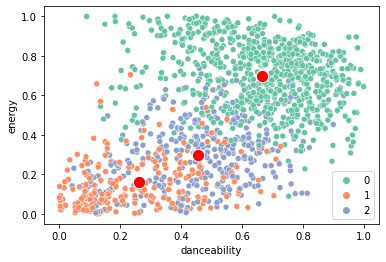

In [ ]:
sns.scatterplot(data=scaled_df, x='danceability', y='energy', hue='clusters', palette='Set2')
sns.scatterplot(data=scaled_df_centroids, x='danceability', y='energy', color='red', s=150)
plt.show()

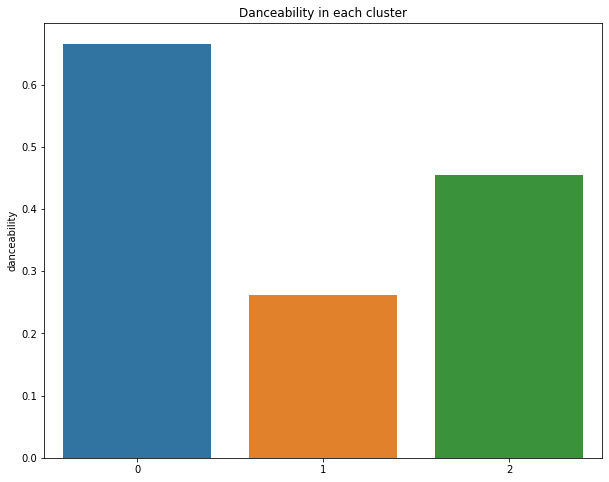

In [ ]:
# plotting danceability through the clusters
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=scaled_df_centroids, x=scaled_df_centroids.index, y="danceability")
plt.title("Danceability in each cluster")
plt.show()

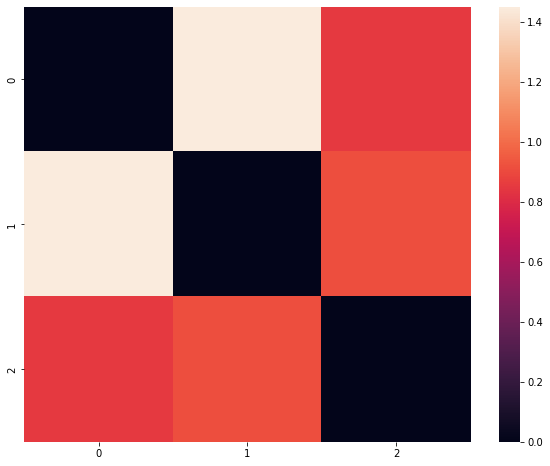

In [ ]:
# creating seaaborn heatmap
def euclidean_distance(data, cluster, cluster_to_compare): 
    distance = (
        pd.DataFrame({
            "cluster_1":data.loc[cluster,:],
            "cluster_2":data.loc[cluster_to_compare,:]
        })
        # applying the formula
        .assign(dist_abs = lambda x: (x.cluster_1 - x.cluster_2)**2)
        .agg({"dist_abs":"sum"})[0]**0.5
    )
    return distance

distances = [[euclidean_distance(scaled_df_centroids, cluster, cluster_to_compare) for cluster in scaled_df_centroids.index] for cluster_to_compare in scaled_df_centroids.index]
eucl_dist = pd.DataFrame(distances, columns=scaled_df_centroids.index, index=scaled_df_centroids.index)
plt.subplots(figsize=(10, 8))
sns.heatmap(eucl_dist)

The heatmap showing us that:
- Cluster 0 and 1 are much similar
- Cluster 2 is more different